In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import skew

In [2]:
users_df = pd.read_csv('users.csv')
repositories_df = pd.read_csv('repositories.csv')

**Distribution of followers among users**

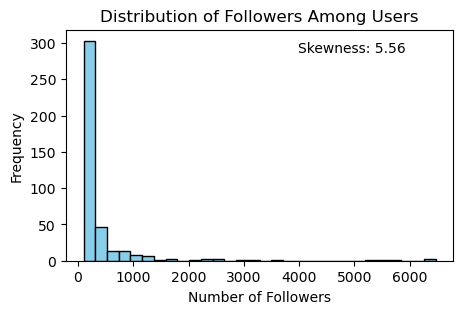

In [3]:
# Calculate skewness
followers_skewness = skew(users_df['followers'].dropna())

plt.figure(figsize=(5, 3))
plt.hist(users_df['followers'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Followers Among Users')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')

plt.text(0.6, 0.9, f'Skewness: {followers_skewness:.2f}', transform=plt.gca().transAxes)

plt.show()

- A few users, possibly those with significant contributions or projects, attract a large following.

**% of hireable users** (Assuming null as non-hireable)

In [4]:
total_users = users_df.shape[0]
hireable_users = users_df['hireable'].notnull().sum()

percentage_hireable = (hireable_users / total_users) * 100

print(f"Percentage of Hireable Users: {percentage_hireable:.2f}%")

Percentage of Hireable Users: 24.32%


- Focus on improving job-seeking tools or networking opportunities for GitHub users

**Company with most users and average followers of users**

In [5]:
company_stats = users_df.groupby('company').agg(
    user_count=('login', 'count'),
    avg_followers=('followers', 'mean')
).sort_values(by='user_count', ascending=False)

print(company_stats.head(10))


                                   user_count  avg_followers
company                                                     
SPOTIFY                                    21     621.380952
EMBARKSTUDIOS                               8     242.000000
GOOGLE                                      8     253.875000
MOJANG                                      6     803.333333
KLARNA                                      5     159.600000
KTH ROYAL INSTITUTE OF TECHNOLOGY           4     694.250000
ZERO-PLUS-X                                 3     691.333333
GRAFANA                                     3     190.333333
MICROSOFT                                   3     194.666667
MENTIMETER                                  2     104.500000


- Mojang has more followers per user, Spotify has more users. 
- Fostering a strong developer community and attracting talent.

**Average number of public repositories per user**

In [6]:
avg_public_repos = users_df['public_repos'].mean()
print(f"Average Number of Public Repositories per User: {avg_public_repos:.2f}")

Average Number of Public Repositories per User: 90.91


**correlation between the number of followers and the number of public repositories**

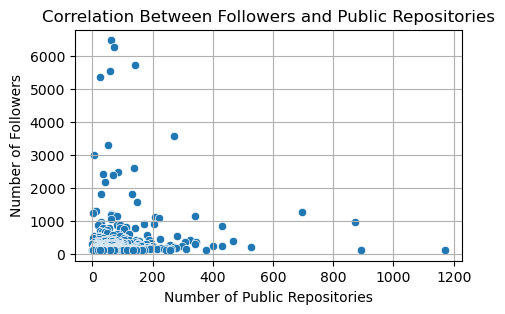

Correlation Coefficient: 0.03


In [7]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=users_df, x='public_repos', y='followers')
plt.title('Correlation Between Followers and Public Repositories')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.grid()
plt.show()

correlation = users_df['followers'].corr(users_df['public_repos'])
print(f"Correlation Coefficient: {correlation:.2f}")

- More public repositories does not lead to more followers.
- Quality of contributions or community engagement may be more influential

**Language - No. of stars**

In [8]:
language_star_counts = repositories_df.groupby('language')['stargazers_count'].sum().sort_values(ascending=False)
print(language_star_counts)

language
JavaScript       140397
Python           132215
Rust              68610
C++               54416
Swift             47891
                  ...  
AMPL                  0
KiCad                 0
Stata                 0
SuperCollider         0
Mercury               0
Name: stargazers_count, Length: 184, dtype: int64


**Year-wise repository count for top 3 languages**

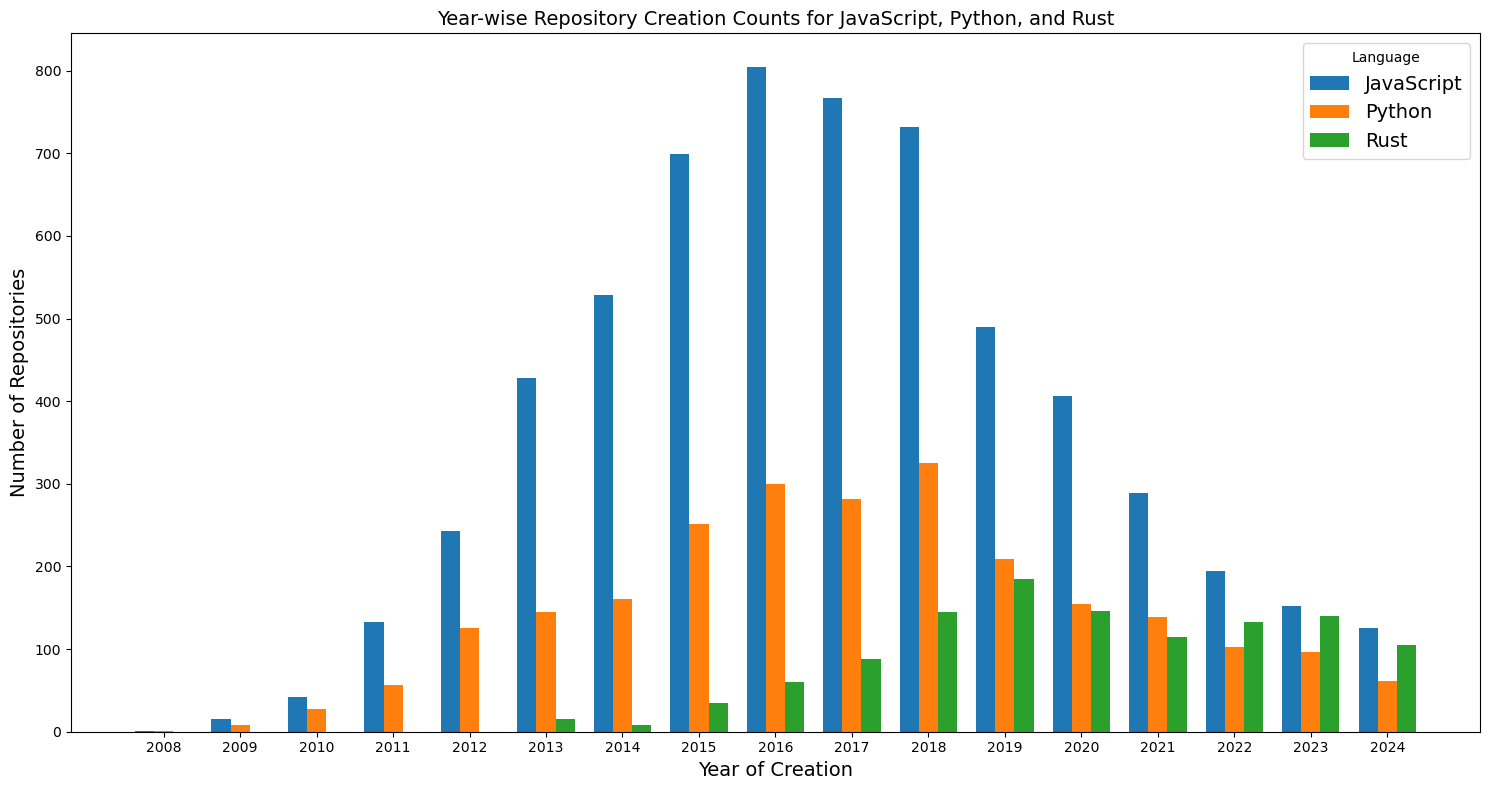

In [9]:
# Convert the created_at column to datetime format and extract the year
repositories_df['created_at'] = pd.to_datetime(repositories_df['created_at'])
repositories_df['created_year'] = repositories_df['created_at'].dt.year

# Filter data for JavaScript, Python, and Rust repositories
languages_of_interest = ['JavaScript', 'Python', 'Rust']
filtered_df = repositories_df[repositories_df['language'].isin(languages_of_interest)]

# Group by year and language to get the creation counts
creation_counts = filtered_df.groupby(['created_year', 'language']).size().unstack().fillna(0)

# Set figure size and adjust spacing parameters
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.25  # Width of each bar

# Generate x positions for each group of bars (one for each year)
years = creation_counts.index
x = range(len(years))

# Plot each language's bar series with an offset for spacing
for i, language in enumerate(languages_of_interest):
    ax.bar([pos + i * bar_width for pos in x], creation_counts[language], 
           width=bar_width, label=language)

# Customizing the plot
ax.set_xticks([pos + bar_width for pos in x])  # Center x ticks between bars
ax.set_xticklabels(years)
ax.set_xlabel("Year of Creation",fontsize=14)
ax.set_ylabel("Number of Repositories",fontsize=14)
ax.set_title("Year-wise Repository Creation Counts for JavaScript, Python, and Rust",fontsize=14)
ax.legend(title='Language',fontsize=14)
plt.tight_layout()
plt.show()


- Enduring appeal of JavaScript
- Emerging significance of Rust. Outgrew Python already &#x1F632;

In [10]:
total_repos = creation_counts.sum(axis=1)

js_high_percentage = (creation_counts['JavaScript'].loc[2014] / total_repos[2014]) * 100
js_latest_percentage = (creation_counts['JavaScript'].iloc[-1] / total_repos.iloc[-1]) * 100
js_percentage_decrease = ((js_high_percentage - js_latest_percentage) / js_high_percentage) * 100

python_high_percentage = (creation_counts['Python'].loc[2018] / total_repos[2018]) * 100
python_latest_percentage = (creation_counts['Python'].iloc[-1] / total_repos.iloc[-1]) * 100
python_percentage_decrease = ((python_high_percentage - python_latest_percentage) / python_high_percentage) * 100

rust_begin_percentage = (creation_counts['Rust'].loc[2014] / total_repos[2014]) * 100
rust_latest_percentage = (creation_counts['Rust'].iloc[-1] / total_repos.iloc[-1]) * 100
rust_percentage_increase = ((rust_latest_percentage - rust_begin_percentage) / rust_begin_percentage) * 100

# Print the statements
print(f"JS High (2014): {js_high_percentage:.2f}")
print(f"JS recent (2024): {js_latest_percentage:.2f}")
print(f"JS % Decrease: {js_percentage_decrease:.2f}%")
print("-------------------------------------------")
print(f"Python High (2014): {python_high_percentage:.2f}")
print(f"Python recent (2024): {python_latest_percentage:.2f}")
print(f"Python % Decrease: {python_percentage_decrease:.2f}%")
print("-------------------------------------------")
print(f"Rust start (2014): {rust_begin_percentage:.2f}")
print(f"Rust recent (2024): {rust_latest_percentage:.2f}")
print(f"Rust % Decrease: {rust_percentage_increase:.2f}%")


JS High (2014): 75.79
JS recent (2024): 43.15
JS % Decrease: 43.06%
-------------------------------------------
Python High (2014): 27.04
Python recent (2024): 20.89
Python % Decrease: 22.74%
-------------------------------------------
Rust start (2014): 1.15
Rust recent (2024): 35.96
Rust % Decrease: 3037.41%


**Star-to-Creation Ratio by year**

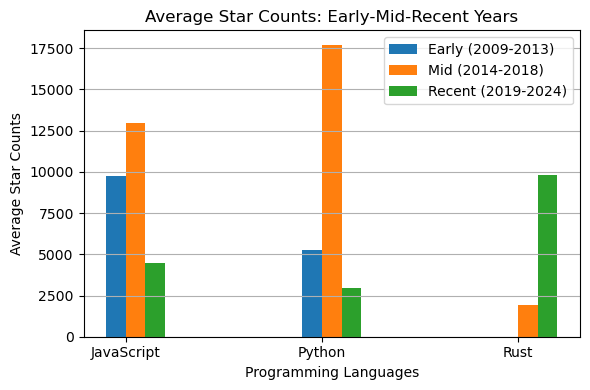

In [11]:
# Convert the created_at column to datetime format and extract the year
repositories_df['created_at'] = pd.to_datetime(repositories_df['created_at'])
repositories_df['created_year'] = repositories_df['created_at'].dt.year

# Filter data for JavaScript, Python, and Rust repositories
languages_of_interest = ['JavaScript', 'Python', 'Rust']
filtered_df = repositories_df[repositories_df['language'].isin(languages_of_interest)]

# Group by year and language to get the sum of stargazers_count
star_counts = filtered_df.groupby(['created_year', 'language'])['stargazers_count'].sum().unstack().fillna(0)

# Define early and recent years
early_years = star_counts.loc[2009:2013]
mid_years = star_counts.loc[2014:2018]
recent_years = star_counts.loc[2019:]

# Calculate average star counts for each language
average_stars = {
    'Language': ['JavaScript', 'Python', 'Rust'],
    'Early (2009-2013)': [
        early_years['JavaScript'].mean(),
        early_years['Python'].mean(),
        early_years['Rust'].mean()
    ],
    'Mid (2014-2018)': [
        mid_years['JavaScript'].mean(),
        mid_years['Python'].mean(),
        mid_years['Rust'].mean()
    ],
    'Recent (2019-2024)': [
        recent_years['JavaScript'].mean(),
        recent_years['Python'].mean(),
        recent_years['Rust'].mean()
    ]
}

# Create DataFrame for average stars
average_stars_df = pd.DataFrame(average_stars)

# Plotting the results
plt.figure(figsize=(6, 4))
bar_width = 0.1
x = range(len(average_stars_df))

# Creating the bar chart
plt.bar(x, average_stars_df['Early (2009-2013)'], width=bar_width, label='Early (2009-2013)', align='center')
plt.bar([p + bar_width for p in x], average_stars_df['Mid (2014-2018)'], width=bar_width, label='Mid (2014-2018)', align='center')
plt.bar([p + 2 * bar_width for p in x], average_stars_df['Recent (2019-2024)'], width=bar_width, label='Recent (2019-2024)', align='center')

# Labeling the plot
plt.xlabel('Programming Languages')
plt.ylabel('Average Star Counts')
plt.title('Average Star Counts: Early-Mid-Recent Years')
plt.xticks([p + bar_width / 2 for p in x], average_stars_df['Language'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [12]:
# Treat nulls in 'hireable' as False
users_df['hireable'] = users_df['hireable'].fillna(False)

# Count repositories for each user
js_repo_counts = repositories_df[(repositories_df['language'] == 'JavaScript')].groupby('login').size()

# Merge user data with Top 3 lang repo counts
users_df['js_repo_counts'] = users_df['login'].map(js_repo_counts).fillna(0).astype(int)

# Create categories for hireable and Rust repo count
users_df['has_js_repos'] = users_df['js_repo_counts'].apply(lambda x: 'JS_Repos' if x > 0 else 'Other_Repos')
users_df['hireable_status'] = users_df['hireable'].apply(lambda x: 'Hireable' if x else 'Non-Hireable')

# Create the contingency table
contingency_table = pd.crosstab(users_df['hireable_status'], users_df['has_js_repos'])
print("Contingency Table:\n", contingency_table)

# Perform Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
alpha = 0.05
print(f"\nChi-Squared Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"alpha: {alpha}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between hireability and having Javascript repositories.")
else:
    print("At 5% significance level, Fail to reject H0: No significant relationship found.")


Contingency Table:
 has_js_repos     JS_Repos  Other_Repos
hireable_status                       
Hireable               89           10
Non-Hireable          243           65

Chi-Squared Statistic: 5.32
P-Value: 0.0210
alpha: 0.05
Degrees of Freedom: 1
Expected Frequencies:
[[ 80.75675676  18.24324324]
 [251.24324324  56.75675676]]
Reject the null hypothesis: There is a significant relationship between hireability and having Javascript repositories.
